In [1]:
run /home/alec/galvanize/capstone/Forecasting_Walmart_Sales/src/script.py

In [178]:
def make_forecast1(series, interval, num_of_test_periods, forecast_period, forecast_month):
    df = resample_series(series, interval)
    train_series = df[:-num_of_test_periods]
    X = make_design_matrix(np.arange(len(train_series)) + 1)
    linear_trend_ols = sm.OLS(train_series.values, X).fit()
    slope_intercept = linear_trend_ols.params
    slope = slope_intercept[0]
    intercept = slope_intercept[1]
    trend = slope*(len(train_series) + forecast_period) + intercept
    sd = sm.tsa.seasonal_decompose(df)
    seasonal_pattern = sd.seasonal[11:23]
    seasonal = seasonal_pattern.loc[seasonal_pattern.index.month == forecast_month].iloc[0, 0]
    forecast = trend + seasonal
    actual = df[-num_of_test_periods:].loc[df[-num_of_test_periods:].index.month == forecast_month].iloc[0, 0]
    error = (forecast-actual)/actual
    return forecast, error, actual, sd

In [179]:
def make_forecast_update(series, interval, num_of_test_periods, forecast_period, forecast_month, sd):
    #df = resample_series(series, interval)
    df = series
    train_series = df[:-num_of_test_periods]
    X = make_design_matrix(np.arange(len(train_series)) + 1)
    linear_trend_ols = sm.OLS(train_series.values, X).fit()
    slope_intercept = linear_trend_ols.params
    slope = slope_intercept[0]
    intercept = slope_intercept[1]
    trend = slope*(len(train_series) + forecast_period) + intercept
    #sd = sm.tsa.seasonal_decompose(df)
    seasonal_pattern = sd.seasonal[11:23]
    seasonal = seasonal_pattern.loc[seasonal_pattern.index.month == forecast_month].iloc[0, 0]
    forecast = trend + seasonal
    actual = df[-num_of_test_periods:].loc[df[-num_of_test_periods:].index.month == forecast_month].iloc[0, 0]
    error = (forecast-actual)/actual
    return forecast, error, actual

In [180]:
def make_forecast_update_w_sd(series, interval, num_of_test_periods, forecast_period, forecast_month):
    #df = resample_series(series, interval)
    df = series
    train_series = df[:-num_of_test_periods]
    X = make_design_matrix(np.arange(len(train_series)) + 1)
    linear_trend_ols = sm.OLS(train_series.values, X).fit()
    slope_intercept = linear_trend_ols.params
    slope = slope_intercept[0]
    intercept = slope_intercept[1]
    trend = slope*(len(train_series) + forecast_period) + intercept
    sd = sm.tsa.seasonal_decompose(df)
    seasonal_pattern = sd.seasonal[11:23]
    seasonal = seasonal_pattern.loc[seasonal_pattern.index.month == forecast_month].iloc[0, 0]
    forecast = trend + seasonal
    actual = df[-num_of_test_periods:].loc[df[-num_of_test_periods:].index.month == forecast_month].iloc[0, 0]
    error = (forecast-actual)/actual
    return forecast, error, actual

In [200]:
def plot_all_errors(store_ids, dept_ids, art_dict, interval):
    series_lst = []
    for idx, val in enumerate(series_setup(store_ids, dept_ids)):
        if idx not in art_dict.keys():
            series_lst.append(resample_series(make_series(val[0], val[1]), interval))
        else:
            series_lst.append(art_dict[idx])
            
    series_lst_no_adjustment = []
    for i in series_setup(store_ids, dept_ids):
            series_lst_no_adjustment.append(make_series(i[0], i[1]))

    forecast_lst = []
    for idx, val in enumerate(series_lst):
        if len(val) < 24:
            forecast_lst.append(abs(make_forecast_update(val, interval, 2, 1, 2, make_forecast1(series_lst_no_adjustment[idx], interval, 2, 1, 2)[3])[1]))
        else:
            forecast_lst.append(abs(make_forecast_update_w_sd(val, interval, 2, 1, 2)[1]))    
    arr = np.array(forecast_lst)
    
    forecast_lst1 = []
    for idx, val in enumerate(series_lst):
        if len(val) < 24:
            forecast_lst1.append(abs(make_forecast_update(val, interval, 2, 2, 3, make_forecast1(series_lst_no_adjustment[idx], interval, 2, 2, 2)[3])[1]))
        else:
            forecast_lst1.append(abs(make_forecast_update_w_sd(val, interval, 2, 2, 3)[1]))
    arr1 = np.array(forecast_lst1)
    
    fig, axs = plt.subplots(2, figsize = (12,12))
    axs[0].hist(arr, label = f'Mean Forecasting Error = {round(arr.mean(),2)}')
    axs[0].set_title('One Months Forecast of All Stores and All Departments Forecasting Error Histogram')
    axs[0].set_ylabel('Count')
    axs[0].set_xlabel('Error')
    axs[0].legend()
    
    axs[1].hist(arr1, label = f'Mean Forecasting Error = {round(arr1.mean(),2)}')
    axs[1].set_title('Two Months Forecast of All Stores and All Departments Forecasting Error Histogram')
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel('Error')
    axs[1].legend()

In [192]:
def test(store_ids, dept_ids, art_dict, interval):
    series_lst = []
    for idx, val in enumerate(series_setup(store_ids, dept_ids)):
        if idx not in art_dict.keys():
            series_lst.append(resample_series(make_series(val[0], val[1]), interval))
        else:
            series_lst.append(art_dict[idx])
            
    series_lst_no_adjustment = []
    for i in series_setup(store_ids, dept_ids):
            series_lst_no_adjustment.append(make_series(i[0], i[1]))

    forecast_lst = []
    for idx, val in enumerate(series_lst):
        if len(val) < 24:
            forecast_lst.append(abs(make_forecast_update(val, interval, 2, 1, 2, make_forecast1(series_lst_no_adjustment[idx], interval, 2, 1, 2)[3])[1]))
        else:
            forecast_lst.append(abs(make_forecast_update_w_sd(val, interval, 2, 1, 2)[1]))    
    arr = np.array(forecast_lst)
    
    forecast_lst1 = []
    for idx, val in enumerate(series_lst):
        if len(val) < 24:
            forecast_lst1.append(abs(make_forecast_update(val, interval, 2, 2, 3, make_forecast1(series_lst_no_adjustment[idx], interval, 2, 2, 2)[3])[1]))
        else:
            forecast_lst1.append(abs(make_forecast_update_w_sd(val, interval, 2, 2, 3)[1]))
    arr1 = np.array(forecast_lst1)
    
    return arr, arr1

test(store_id, dept_id, art_dict, 'M')

(array([0.03236774, 0.00973319, 0.03443686, 0.01861275, 0.0889732 ,
        0.00295486, 0.02326951, 0.1135567 , 0.18656886, 0.08942128,
        0.08730532, 0.10132383, 0.08306637, 0.16137363, 0.05585567,
        0.34256427, 0.10056743, 0.01888826, 0.04994856, 0.07869804,
        0.00323434, 0.0825476 , 0.08746689, 0.00902026, 0.0027015 ,
        0.1477235 , 0.05706067, 0.00958598, 0.00926547, 0.00210616,
        0.12233721, 0.14571632, 0.31139121, 0.06010277, 0.04513241,
        0.03196279, 0.00991893, 0.01268354, 0.11015168, 0.14435406,
        0.16754766, 0.11864258, 0.03365415, 0.22619976, 0.10785253,
        0.02108879, 0.17759433, 0.12256191, 0.09901664, 0.01940821,
        0.37165875, 0.03979708, 0.04224961, 0.05619776, 0.0096504 ,
        0.09886455, 0.02289748, 0.10944426, 0.11806462, 0.04571666,
        0.20205204, 0.11278719, 0.00652521, 0.07599317, 0.04512352,
        0.0357203 , 0.20106968, 0.08005723, 0.30256348, 0.22739954]),
 array([0.07487828, 0.09496572, 0.08721698, 0.

In [194]:
art_dict = {}
art_dict[12] = resample_series(make_series('CA_2', 'FOODS_2'),'M')[-6:]
art_dict[4] = resample_series(make_series('CA_1', 'FOODS_1'),'M')[22:]
art_dict[1] = resample_series(make_series('CA_1', 'HOBBIES_2'),'M')[44:]
art_dict[13] = resample_series(make_series('CA_2', 'FOODS_3'),'M')[53:]

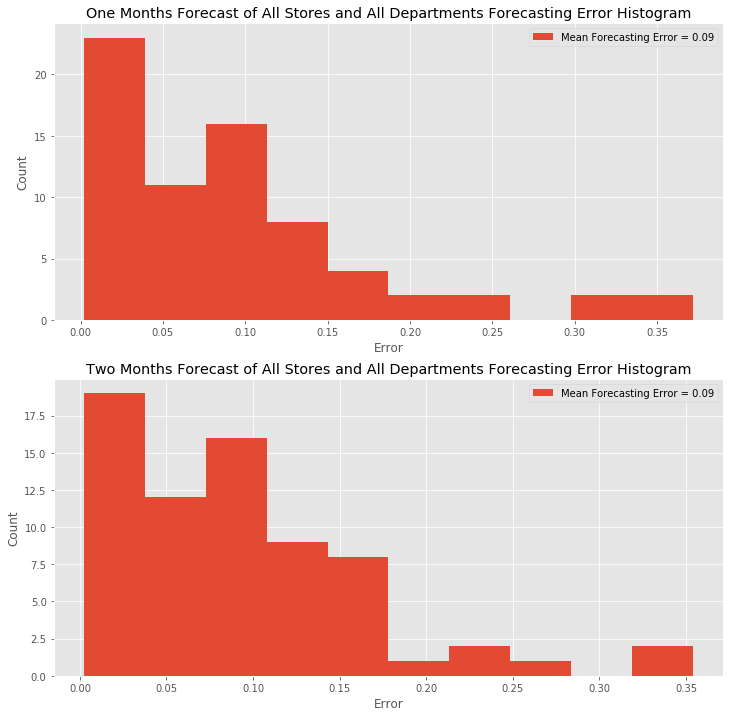

In [201]:
plot_all_errors(store_id, dept_id, art_dict, 'M')

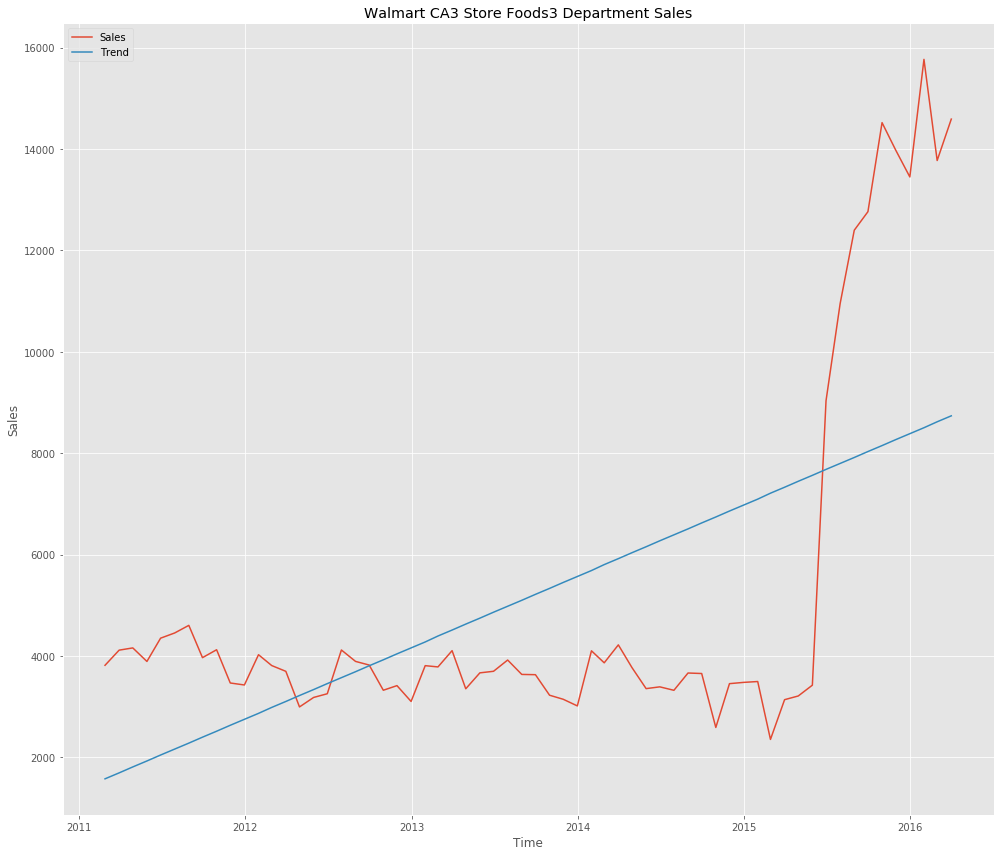

In [78]:
ca2_foods2 = Graphs(make_series('CA_2', 'FOODS_2'), 'M', 'Walmart CA3 Store Foods3 Department Sales')
ca2_foods2.linear_trend()

In [83]:
resample_series(make_series('CA_2', 'FOODS_2'),'M')[-6:]

,TOTAL
date,
2015-10-31,14520
2015-11-30,13978
2015-12-31,13449
2016-01-31,15768
2016-02-29,13773
2016-03-31,14590


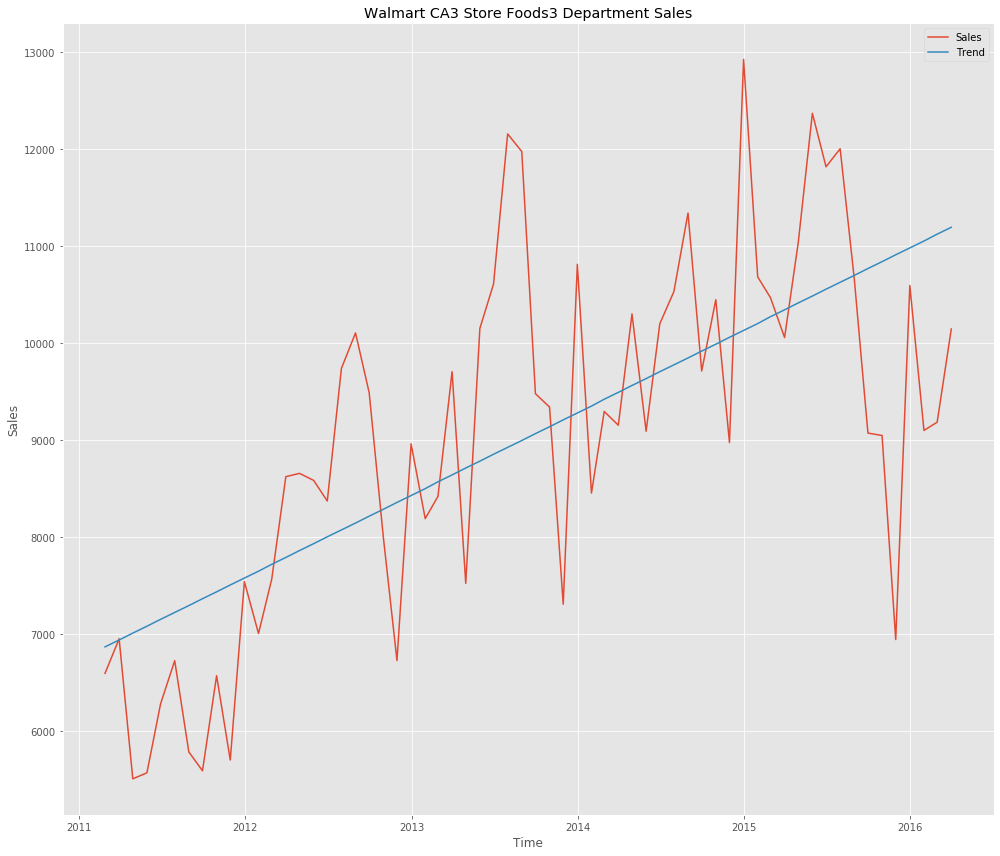

In [84]:
a = Graphs(make_series('CA_1', 'FOODS_1'), 'M', 'Walmart CA3 Store Foods3 Department Sales')
a.linear_trend()

In [89]:
resample_series(make_series('CA_1', 'FOODS_1'),'M')[22:]

,TOTAL
date,
2012-12-31,8963
2013-01-31,8191
2013-02-28,8421
2013-03-31,9708
2013-04-30,7524
...,...
2015-11-30,6944
2015-12-31,10596
2016-01-31,9101


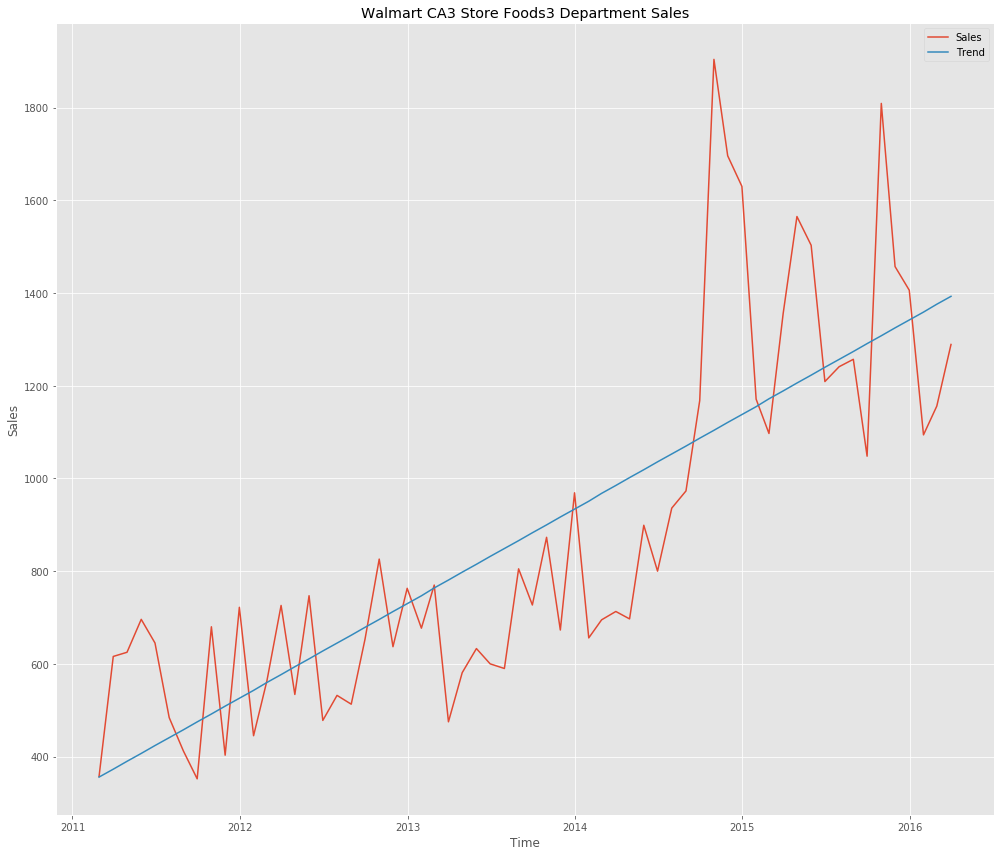

In [104]:
a = Graphs(make_series('CA_1', 'HOBBIES_2'), 'M', 'Walmart CA3 Store Foods3 Department Sales')
a.linear_trend()

In [109]:
resample_series(make_series('CA_1', 'HOBBIES_2'),'M')[44:]

,TOTAL
date,
2014-10-31,1904
2014-11-30,1696
2014-12-31,1630
2015-01-31,1171
2015-02-28,1097
...,...
2015-11-30,1457
2015-12-31,1406
2016-01-31,1094


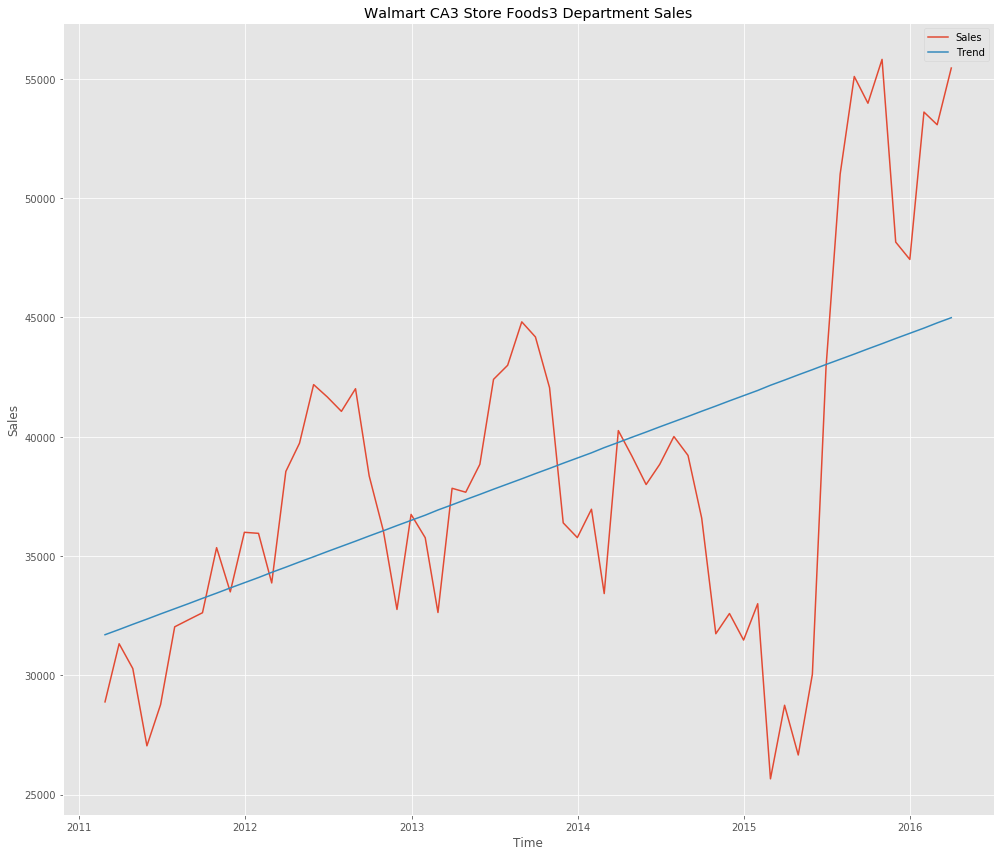

In [110]:
a = Graphs(make_series('CA_2', 'FOODS_3'), 'M', 'Walmart CA3 Store Foods3 Department Sales')
a.linear_trend()

In [113]:
resample_series(make_series('CA_2', 'FOODS_3'),'M')[53:]

,TOTAL
date,
2015-07-31,51008
2015-08-31,55101
2015-09-30,53980
2015-10-31,55818
2015-11-30,48158
2015-12-31,47432
2016-01-31,53609
2016-02-29,53078
2016-03-31,55455


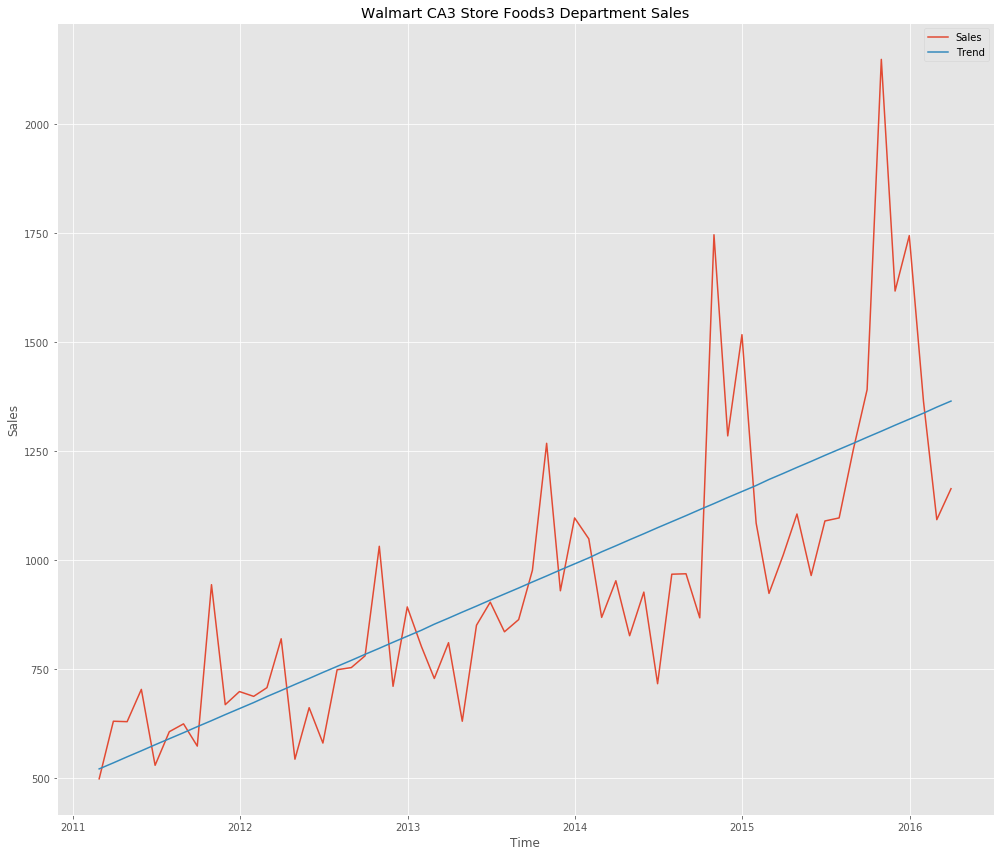

In [114]:
a = Graphs(make_series('CA_2', 'HOBBIES_2'), 'M', 'Walmart CA3 Store Foods3 Department Sales')
a.linear_trend()